# TELECOM CHURN PREDICTION PROJECT

## Importing packages and reading files

In [1]:
import pandas as pd
import numpy as np
import qgrid
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('data/projeto4_telecom_treino.csv')

In [3]:
test = pd.read_csv('data/projeto4_telecom_teste.csv')

## Analyzing and pre-processing

In [4]:
train.dtypes

Unnamed: 0                         int64
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [5]:
train

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3329,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,no
3329,3330,WV,68,area_code_415,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,no
3330,3331,RI,28,area_code_510,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,no
3331,3332,CT,184,area_code_510,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,no


In [6]:
# dropping unnecessary data and enconding categorical variables and the label on the Train set

## drop
train.drop(['Unnamed: 0','state','area_code'],axis=1,inplace=True)

## enconding
train['churn'] = np.where(train['churn'] == 'yes',1,0)
train['international_plan'] = np.where(train['international_plan'] == 'yes',1,0)
train['voice_mail_plan'] = np.where(train['voice_mail_plan'] == 'yes',1,0)


## separating in X and Y
X_train = train.drop(['churn'],axis=1)
Y_train = train['churn']

In [7]:
# dropping unnecessary data and enconding categorical variables and the label on the Test set

## drop
test.drop(['Unnamed: 0','state','area_code'],axis=1,inplace=True)

## enconding
test['churn'] = np.where(test['churn'] == 'yes',1,0)
test['international_plan'] = np.where(test['international_plan'] == 'yes',1,0)
test['voice_mail_plan'] = np.where(test['voice_mail_plan'] == 'yes',1,0)


## separating in X and Y
X_test = test.drop(['churn'],axis=1)
Y_test = test['churn']

In [8]:
train.isnull().sum()

account_length                   0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

### Correlation Analysis

In [9]:
# Correlation analysis
train.corr()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
account_length,1.000000,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
international_plan,0.024735,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
voice_mail_plan,0.002918,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number_vmail_messages,-0.004628,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total_day_minutes,0.006216,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total_day_calls,0.038470,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total_day_charge,0.006214,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total_eve_minutes,-0.006757,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total_eve_calls,0.019260,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total_eve_charge,-0.006745,0.019106,0.021559,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786


Through correlation analysis, we can see that there are highly correlated columns, and this can affect performance, 
so I will use a method to check multicollinearity and eliminate the correlated columns.

In [10]:
# Taken from https://www.kaggle.com/remilpm/how-to-remove-multicollinearity

#Applying multicollinearity to remove columns which are dependent on each other
# From looking at documentation, values between 5 and 10 are "okay".
# Above 10 is too high and so should be removed.

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer 



class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=10, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = SimpleImputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [11]:
# Remove columns having higher VIF factor

Mult_Coll = ReduceVIF()

X_train = Mult_Coll.fit_transform(X_train)

X_train.head()

ReduceVIF fit
ReduceVIF transform
Dropping total_day_charge with vif=124624534.9321401
Dropping total_eve_charge with vif=37386877.435472645
Dropping total_night_minutes with vif=10712330.026845861
Dropping total_intl_charge with vif=998281.4991030562
Dropping total_night_calls with vif=22.26256386501424
Dropping total_day_calls with vif=20.971989122712756
Dropping total_eve_calls with vif=19.49210123324103
Dropping voice_mail_plan with vif=16.423158657926347
Dropping total_eve_minutes with vif=12.768387646343257
Dropping total_night_charge with vif=11.563292739461142


,account_length,international_plan,number_vmail_messages,total_day_minutes,total_intl_minutes,total_intl_calls,number_customer_service_calls
0,128.0,0.0,25.0,265.1,10.0,3.0,1.0
1,107.0,0.0,26.0,161.6,13.7,3.0,1.0
2,137.0,0.0,0.0,243.4,12.2,5.0,0.0
3,84.0,1.0,0.0,299.4,6.6,7.0,2.0
4,75.0,1.0,0.0,166.7,10.1,3.0,3.0


In [12]:
X_test = Mult_Coll.transform(X_test)
X_test.head()

ReduceVIF transform
Dropping total_day_charge with vif=124772178.4773819
Dropping total_eve_charge with vif=37316749.24280096
Dropping total_night_charge with vif=10354973.604461685
Dropping total_intl_charge with vif=1046186.2399581451
Dropping total_day_calls with vif=22.79854400195793
Dropping total_eve_calls with vif=20.72179420558222
Dropping total_night_calls with vif=18.95306706542499
Dropping voice_mail_plan with vif=13.362621673031748
Dropping total_night_minutes with vif=13.16354481731038
Dropping total_eve_minutes with vif=12.06759548251358


,account_length,international_plan,number_vmail_messages,total_day_minutes,total_intl_minutes,total_intl_calls,number_customer_service_calls
0,101.0,0.0,0.0,70.9,10.6,3.0,3.0
1,137.0,0.0,0.0,223.6,9.5,7.0,0.0
2,103.0,0.0,29.0,294.7,13.7,6.0,1.0
3,99.0,0.0,0.0,216.8,15.7,2.0,1.0
4,108.0,0.0,0.0,197.4,7.7,4.0,2.0


### Analyzing the output imbalance

In [13]:
train['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

<AxesSubplot:>

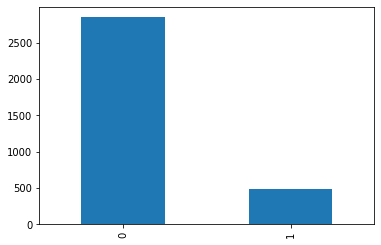

In [14]:
train['churn'].value_counts().plot(kind='bar')

there are clearly an imbalance, so I will use SMOTE technique to resample the data

In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=0)

X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)


<AxesSubplot:xlabel='churn'>

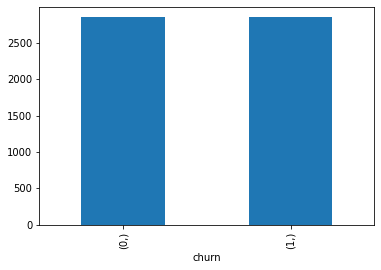

In [16]:
pd.DataFrame(Y_train_resampled).value_counts().plot(kind='bar')

## Creating Pipeline and selecting the best model

For this project I will apply StandardScaler for the numeric columns and test several algorithms

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [18]:
seed = 7

## creating the tranformer for the numerical columns
numeric_features = X_train.columns.difference(['international_plan','voice_mail_plan'])
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

## creating the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)],remainder='passthrough')


# Preparing models
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('RANDOM FOREST', RandomForestClassifier(n_estimators = 100, max_features = 3)))
modelos.append(('ADB',AdaBoostClassifier(n_estimators = 30, random_state = seed)))
modelos.append(('GRADIENT', GradientBoostingClassifier(n_estimators = 100, random_state = seed)))
modelos.append(('XGB', XGBClassifier(verbosity=0)))
modelos.append(('SVM', SVC()))


# Evaluating each model
resultados = []
nomes = []

for nome, modelo in modelos:
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', modelo)])


    clf.fit(X_train_resampled,Y_train_resampled)
    cv_results = clf.score(X_test, Y_test)
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f " % (nome, cv_results)
    print(msg)


LR: 0.761848 
LDA: 0.766047 
NB: 0.827235 
KNN: 0.803239 
CART: 0.898620 
RANDOM FOREST: 0.926215 
ADB: 0.855429 
GRADIENT: 0.928014 
XGB: 0.926215 
SVM: 0.855429 


The best performance was with the GRADIENT algorithm

## Training the chosen model and evaluating

In [19]:
numeric_features = X_train.columns.difference(['international_plan','voice_mail_plan'])
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)],remainder='passthrough')

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', GradientBoostingClassifier(n_estimators = 100, random_state = seed))])


clf.fit(X_train_resampled, Y_train_resampled)


print("model score: %.3f" % clf.score(X_test, Y_test))

model score: 0.928


### Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

previsoes = clf.predict(X_test)
matrix = confusion_matrix(Y_test, previsoes)


print(matrix)

[[1396   47]
 [  73  151]]


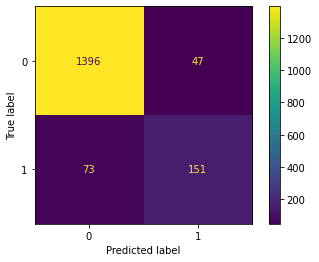

In [21]:
ConfusionMatrixDisplay(matrix).plot()

### Probabilities

In [22]:
prediction_of_probability= clf.predict_proba(X_test)

In [23]:
df_test = pd.DataFrame()
df_test['True Target'] = Y_test
df_test['Predicted Target'] = previsoes
df_test['prob_0'] = prediction_of_probability[:,0] 
df_test['prob_1'] = prediction_of_probability[:,1]

In [24]:
df_test

,True Target,Predicted Target,prob_0,prob_1
0,0,0,0.906496,0.093504
1,0,0,0.829713,0.170287
2,0,0,0.868185,0.131815
3,0,0,0.910286,0.089714
4,0,0,0.927861,0.072139
...,...,...,...,...
1662,0,0,0.919346,0.080654
1663,1,0,0.917717,0.082283
1664,0,0,0.949231,0.050769
1665,0,0,0.958220,0.041780


### ROC Curves

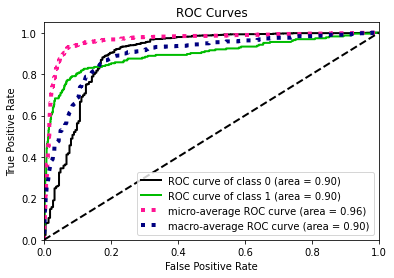

In [25]:
import scikitplot as skplt

skplt.metrics.plot_roc(Y_test, prediction_of_probability)

plt.show()

### Saving

In [26]:
import pickle

# Saving
arquivo = 'Gradient-Telecom.sav'
pickle.dump(modelo, open(arquivo, 'wb'))